In [43]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

import nltk 
from nltk import ngrams
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords

In [7]:
df = pd.read_table('amazon_alexa.tsv')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [45]:
review_positive = df[df['rating']>3]['verified_reviews'].astype(str)
review_positive[:5]

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [48]:
review_positive[2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [20]:
review_negative = df[df['rating']<4]['verified_reviews'].astype(str)
review_negative[:5]

6     Without having a cellphone, I cannot use many ...
24    I got a second unit for the bedroom, I was exp...
33    The speakers sound pretty good for being so sm...
46    It's like Siri, in fact, Siri answers more acc...
49    No different than Apple. To play a specific li...
Name: verified_reviews, dtype: object

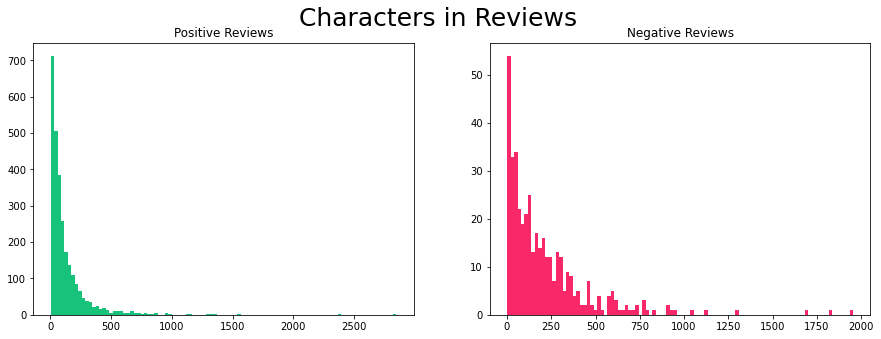

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

review_len = review_positive.str.len()
ax1.hist(review_len, color='#17C37B', bins=100)
ax1.set_title('Positive Reviews')


review_len = review_negative.str.len()
ax2.hist(review_len, color='#F92969', bins=100)
ax2.set_title('Negative Reviews')


fig.suptitle('Characters in Reviews', size=25)
plt.show()

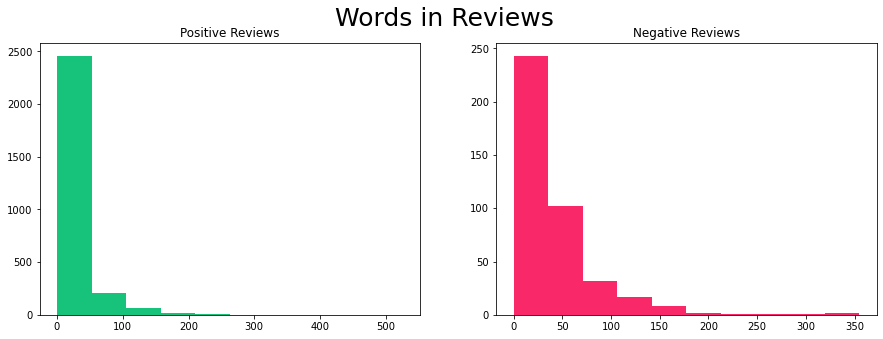

In [25]:
# lets explore the number of words in particular reviews 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

review_len = review_positive.str.split().map(lambda x: len(x))
ax1.hist(review_len, color='#17C37B')
ax1.set_title('Positive Reviews')


review_len = review_negative.str.split().map(lambda x: len(x))
ax2.hist(review_len, color='#F92969')
ax2.set_title('Negative Reviews')


fig.suptitle('Words in Reviews', size=25)
plt.show()

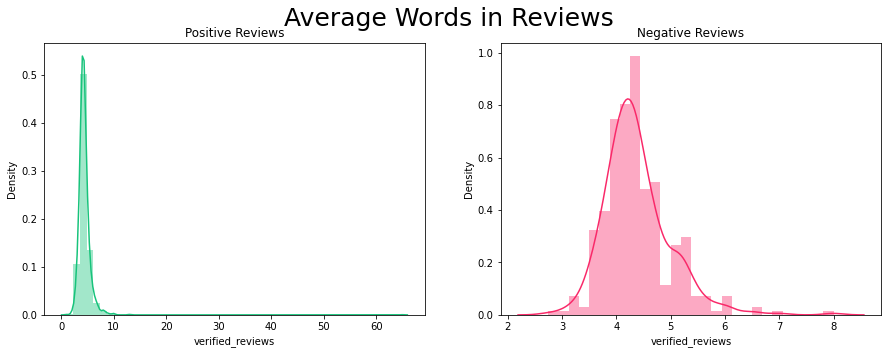

In [26]:
warnings.filterwarnings('ignore')
# Average word Length in the reviews
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

word = review_positive.str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x  : np.mean(x)), ax=ax1, color='#17C37B')
ax1.set_title('Positive Reviews')


word = review_negative.str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x  : np.mean(x)), ax=ax2, color='#F92969')
ax2.set_title('Negative Reviews')


fig.suptitle('Average Words in Reviews', size=25)
plt.show()

In [31]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
plt.figure(figsize=(15,10))

stopwords = set(STOPWORDS)
def word__cloud(text):
    data = ' '.join(text.tolist())


    wordcloud = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              max_words=2000,
        width=2000, height=800
                             ).generate(data)

    print(wordcloud)
    plt.figure(figsize=(20, 20))
    plt.imshow(wordcloud)
    
    plt.axis('off')
    plt.show()

<Figure size 1080x720 with 0 Axes>

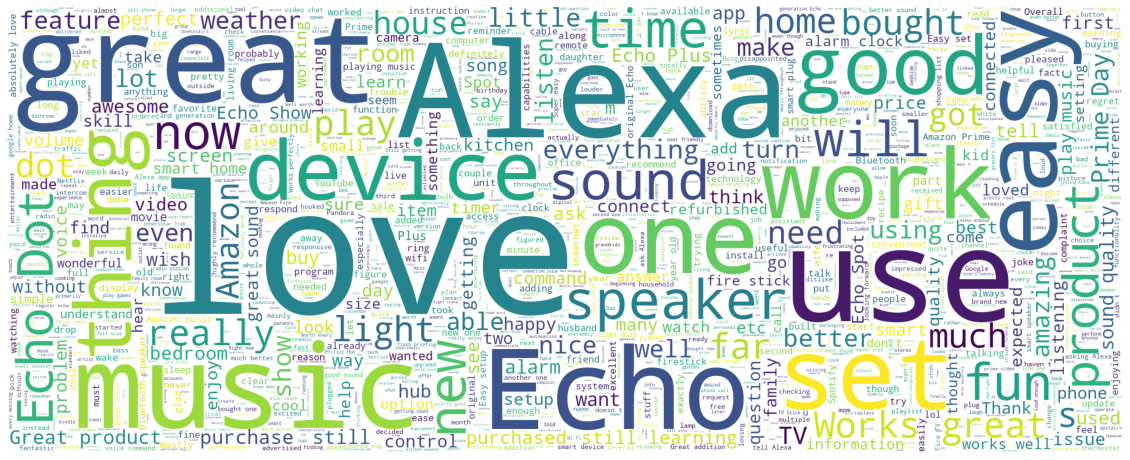

In [32]:
word__cloud(review_positive)

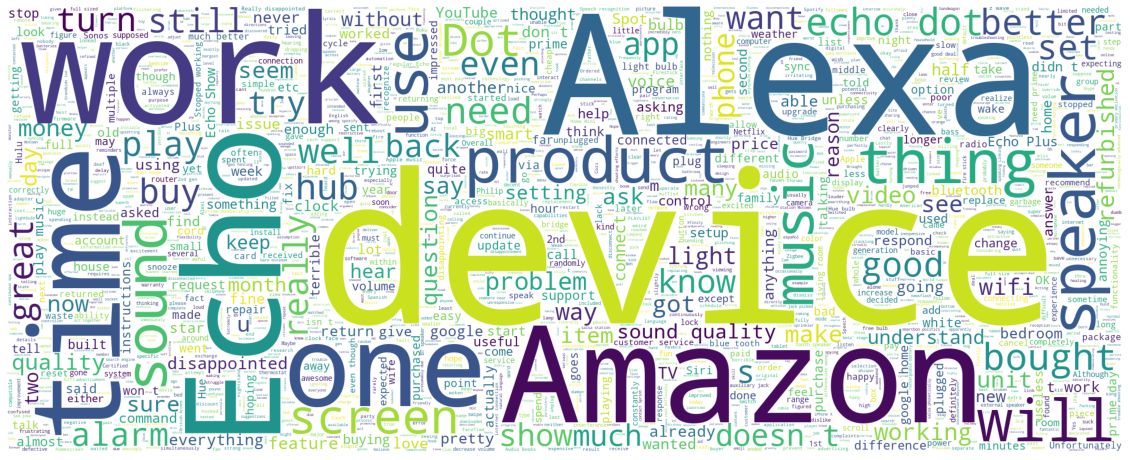

In [33]:
word__cloud(review_negative)

In [35]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/kaijo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
corpus = []
review_corpus = reviews['verified_reviews'].str.split()
review_corpus = review_corpus.values.tolist()
corpus = [word for i in review_corpus for word in i]


from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

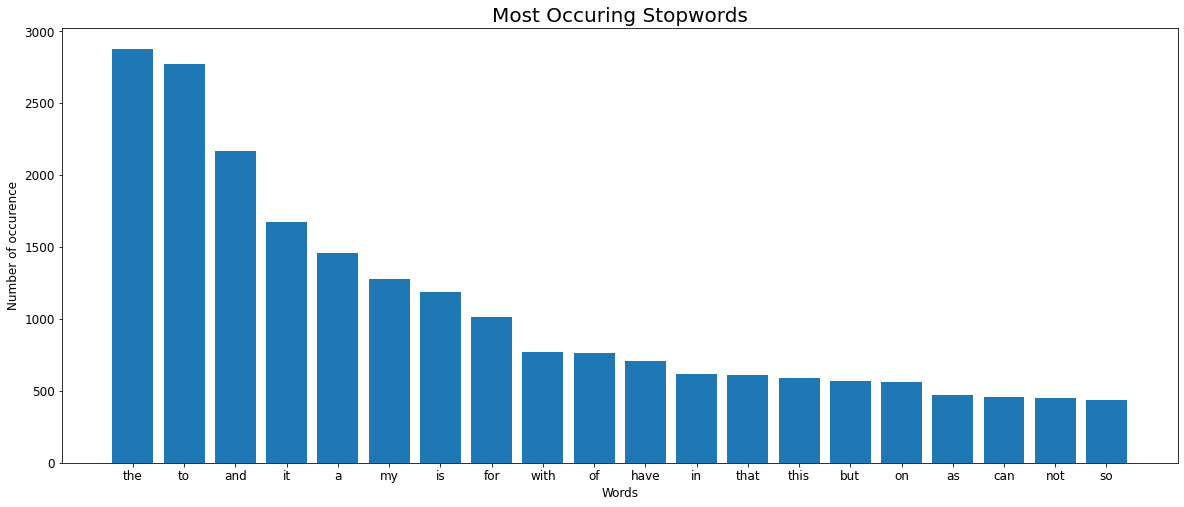

In [37]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
x,y=zip(*top)
plt.figure(figsize=(20,8))
plt.xlabel('Words')
plt.ylabel('Number of occurence')
plt.title('Most Occuring Stopwords', size=20)
plt.bar(x,y)
plt.show()

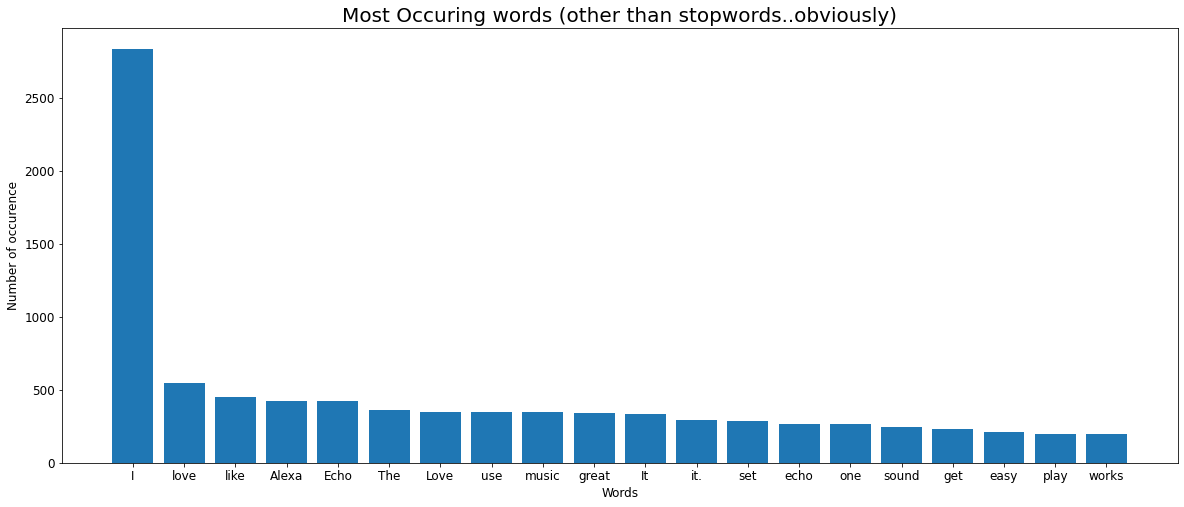

In [38]:
dic = defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word] += 1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
x,y=zip(*top)
plt.figure(figsize=(20,8))
plt.xlabel('Words')
plt.ylabel('Number of occurence')
plt.title('Most Occuring words (other than stopwords..obviously)', size=20)
plt.bar(x,y)
plt.show()

In [40]:
def clean_text(tweets):
    
    # Replacing @handle with the word USER
    tweets_handle = tweets.str.replace(r'@[\S]+', 'user')
    
    # Replacing the Hast tag with the word hASH
    tweets_hash = tweets_handle.str.replace(r'#(\S+)','hash')
    
    # Removing the all the Retweets
    tweets_r = tweets_hash.str.replace(r'\brt\b',' ')
    
    # Replacing the URL or Web Address
    tweets_url = tweets_r.str.replace(r'((www\.[\S]+)|(http?://[\S]+))','URL')
    
    # Replacing Two or more dots with one
    tweets_dot = tweets_url.str.replace(r'\.{2,}', ' ')
    
    # Removing all the special Characters
    tweets_special = tweets_dot.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    tweets_ascii = tweets_special.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    tweets_space = tweets_ascii.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    Dataframe = tweets_space.str.replace(r'\s+',' ')
    
    return Dataframe

In [41]:
reviews['text'] = clean_text(reviews['verified_reviews'])
reviews['text'] = reviews['text'].apply(str)

In [44]:
df_data_pos = " ".join(reviews['text'])
bigrams_pos = ngrams(word_tokenize(df_data_pos), 2)
frequency_pos = Counter(bigrams_pos)
df_pos = pd.DataFrame(frequency_pos.most_common(20))
plt.figure(figsize=(20, 12))

# Barplot that shows the top 20 Bigrams
sns_pos_2 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'blue')
# Setting axes labels
sns_pos_2.set(xlabel = 'Occurrence', ylabel = 'Bigrams', title = 'Top 20 Bigrams for the Positive Sentiment');
plt.show()

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/kaijo/nltk_data'
    - '/home/kaijo/anaconda3/nltk_data'
    - '/home/kaijo/anaconda3/share/nltk_data'
    - '/home/kaijo/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************
